<a href="https://colab.research.google.com/github/Gwin2/Telebot/blob/main/Lab1_hints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Данный ноутбук содержит подсказки к решению первой лабораторной работы, а не является шалоном к решению. Ваше решение можете оформить так, как вам удобно. Смысл этого ноутбука - дать быстрый старт для выполнения дз и прояснить формулировки задания, если есть непонятные моменты (по выводам ячеек можно лучше понять, что имелось в виду в задании).

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
iris = datasets.load_iris(as_frame=True)
df = iris.data
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Задание 1

##### Корреляции между признаками на всей таблице.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


**Вывод:** ...

##### Корреляции между признаками отдельно по классам.

In [ ]:
# Класс 0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.742547,0.267176,0.278098
sepal width (cm),0.742547,1.000000,0.177700,0.232752
petal length (cm),0.267176,0.177700,1.000000,0.331630
petal width (cm),0.278098,0.232752,0.331630,1.000000


In [ ]:
# Класс 1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.525911,0.754049,0.546461
sepal width (cm),0.525911,1.000000,0.560522,0.663999
petal length (cm),0.754049,0.560522,1.000000,0.786668
petal width (cm),0.546461,0.663999,0.786668,1.000000


In [ ]:
# Класс 2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


**Вывод:** ...

#### Визуализация распределения классов на всех парах переменных.

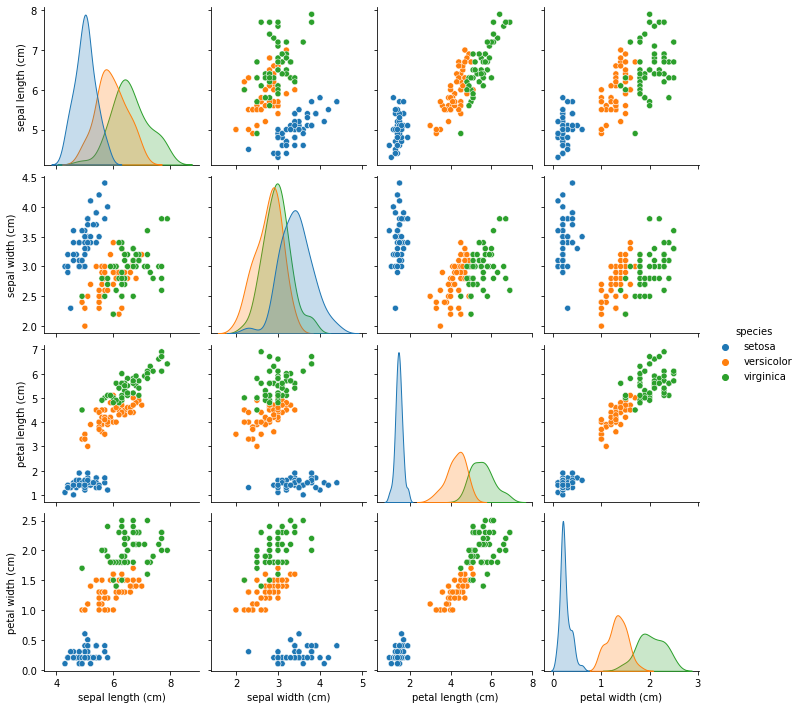

**Вывод:** ...

## Задание 2

In [ ]:
# sepal width - petal length -- мой вариант, вы можете (и очень желательно) взять любой другой набор пары признаков

In [ ]:
df_new = df.drop(columns=['sepal length (cm)', 'petal width (cm)'])

In [ ]:
df_new

,sepal width (cm),petal length (cm),target,species
0,3.5,1.4,0,setosa
1,3.0,1.4,0,setosa
2,3.2,1.3,0,setosa
3,3.1,1.5,0,setosa
4,3.6,1.4,0,setosa
...,...,...,...,...
145,3.0,5.2,2,virginica
146,2.5,5.0,2,virginica
147,3.0,5.2,2,virginica
148,3.4,5.4,2,virginica


In [ ]:
X = datasets.load_iris().data[:, 1:3]

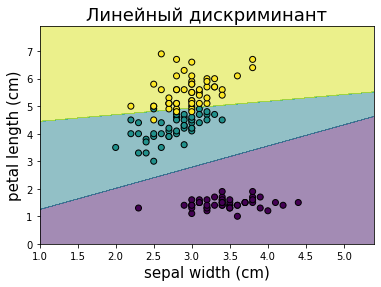

Accuracy =  0.9533333333333334
Balanced accuracy =  0.9533333333333333


In [ ]:
clf = LinearDiscriminantAnalysis(solver='lsqr').fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Линейный дискриминант', fontsize=18)
plt.show()
acc = accuracy_score(df_new.target, clf.predict(X))
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Accuracy = ', acc)
print('Balanced accuracy = ', balanced_acc)

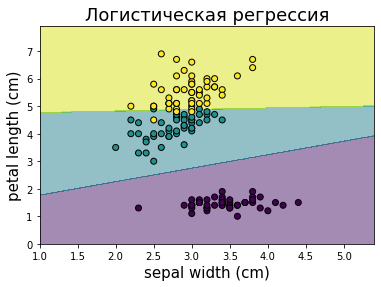

Balanced accuracy =  0.9533333333333333


In [ ]:
clf = LogisticRegression().fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Логистическая регрессия', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

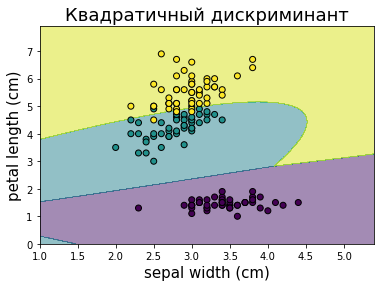

Balanced accuracy =  0.9533333333333333


In [ ]:
clf = QuadraticDiscriminantAnalysis().fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Квадратичный дискриминант', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

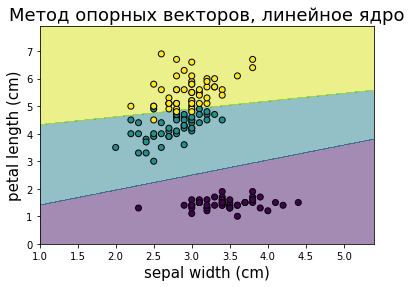

Balanced accuracy =  0.96


In [ ]:
clf = SVC(kernel='linear').fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Метод опорных векторов, линейное ядро', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

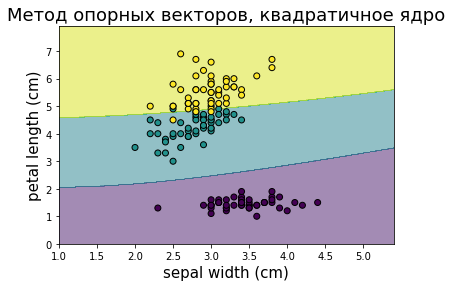

Balanced accuracy =  0.96


In [ ]:
clf = SVC(kernel='poly', degree=2).fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Метод опорных векторов, квадратичное ядро', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

**Вывод:** ...

## Задание 3

In [ ]:
train = df.loc[df['species'] != 'setosa'].reset_index(drop=True)
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,7.0,3.2,4.7,1.4,1,versicolor
1,6.4,3.2,4.5,1.5,1,versicolor
2,6.9,3.1,4.9,1.5,1,versicolor
3,5.5,2.3,4.0,1.3,1,versicolor
4,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2,virginica
96,6.3,2.5,5.0,1.9,2,virginica
97,6.5,3.0,5.2,2.0,2,virginica
98,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
# к визуализации добавить подпись осей

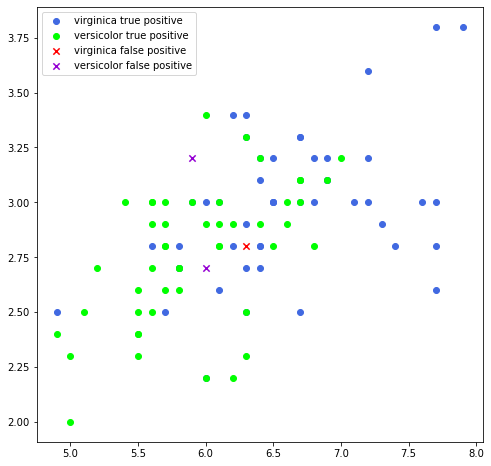

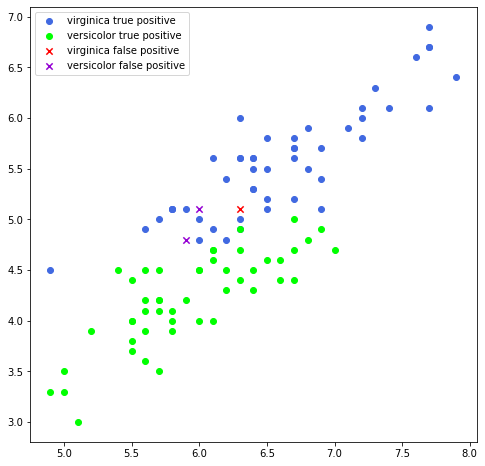

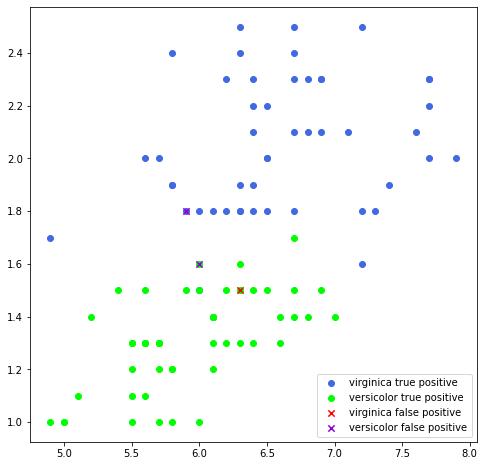

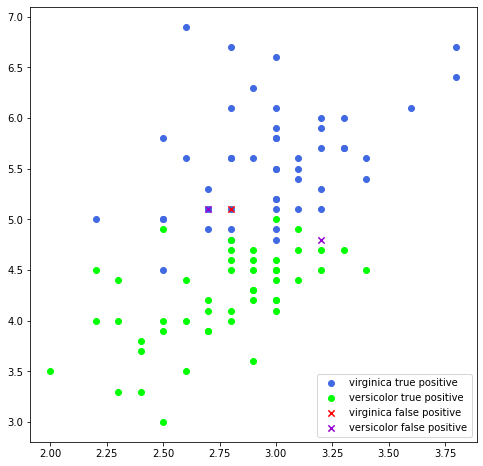

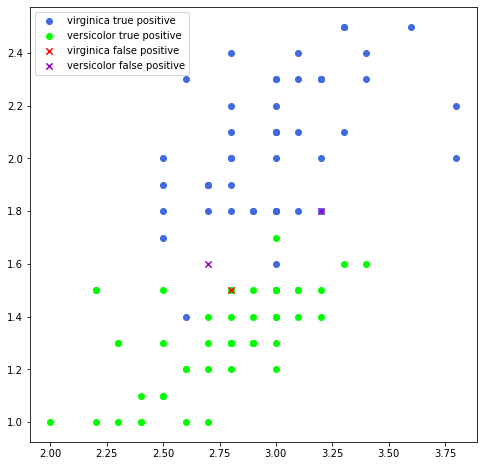

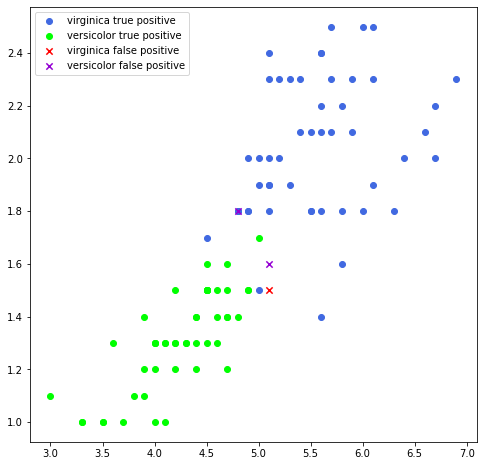

## Задание 4

In [ ]:
# этот пункт вы можете решать как угодно, но декомпозиция кода на отдельные функции делает его более удобным и масштабируемым

def Q_1(x, Sigma, mu):
    ...


def Q_2(x, Lamda, nu):
    ...


def l_0(x, df_X_1, df_X_2):
    ...


def plot_decision_curve_comparison(X, y, h = 0.01):
    ...

In [ ]:
X_train = train[['sepal width (cm)', 'petal length (cm)']]
y_train = train.target

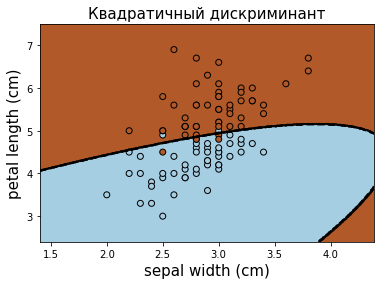

In [ ]:
plot_decision_curve_comparison(X_train, y_train)

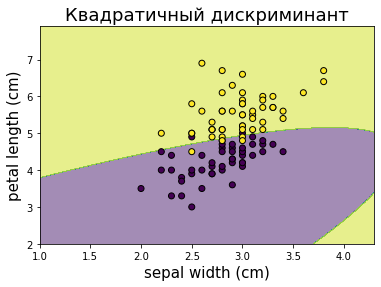

In [ ]:
# из sklearn